# Image Analysis

In [124]:
# basic imports and notebook configurations
# standard Python modules
import logging
import os
import sys

# additional Python modules
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

# own python modules
from methods import *

# %aimport analyis
#importlib.reload(influx_db)
#importlib.reload(plot_tools)
plt.style.use('classic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logging configuration

In [125]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')
log = logging.getLogger(os.path.splitext(os.path.basename(sys.argv[0]))[0])
log.setLevel(logging.INFO)

### Development setup

2023-04-27 15:47:13,706 - INFO - methods.py - get_image_files - Found 9 images for case test_data
2023-04-27 15:47:13,850 - INFO - methods.py - make_histo - Already created histogramm for image 00000037_0000000023994197 in folder png_cases
2023-04-27 15:47:14,390 - INFO - methods.py - segment_camera - Insta seed value: 39
2023-04-27 15:47:30,268 - INFO - methods.py - segment_camera - Cam final upper value 46
2023-04-27 15:47:30,382 - INFO - methods.py - segment_camera - Unique values cam [0 1]
2023-04-27 15:47:31,680 - INFO - methods.py - segment_instability - (1119, 1353, 4, 47)
2023-04-27 15:47:31,763 - INFO - methods.py - segment_instability - Insta Seeds : [(1143, 1131), (1169, 1089), (1169, 1176), (1269, 1097), (1269, 1184), (1344, 1102), (1344, 1189)]
2023-04-27 15:47:31,832 - ERROR - methods.py - process_image - No instability found in 00000037_0000000023994197


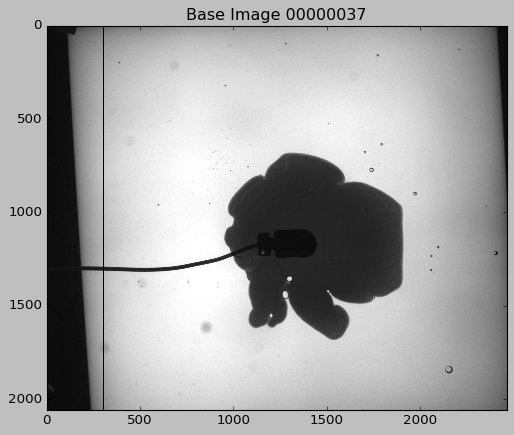

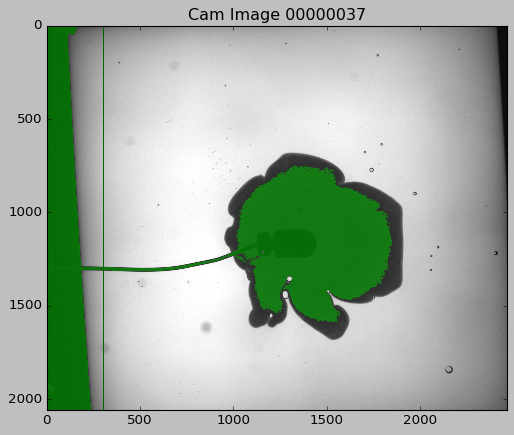

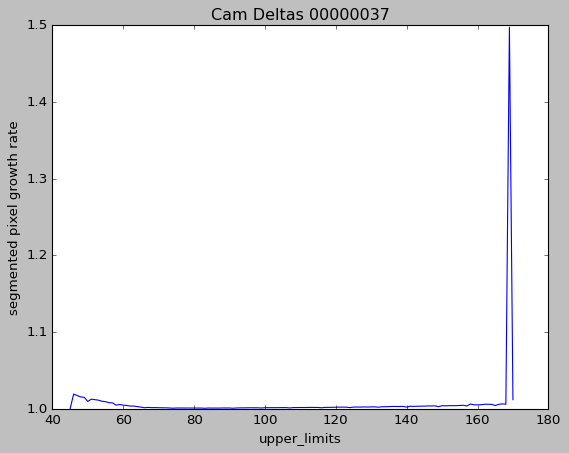

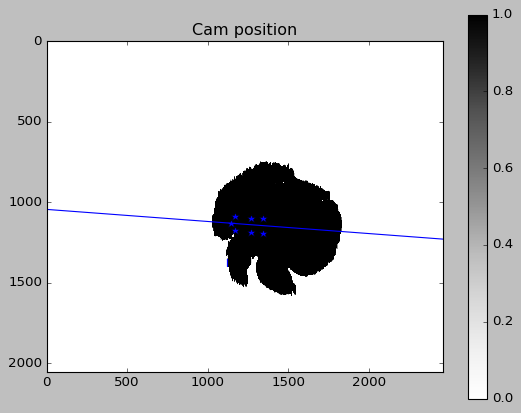

In [126]:
# read config
config = get_config()
# get dev case
cases = config["cases"]
# get image name
for cas in cases:
    images = get_image_files(config, cas, "png_cases")
    for img in images:
        process_image(img, config, cas)